# Lecture 17

In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from numpy import nan as NaN
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy import stats

### Data transformation and normalization
* Use boxplot to take a quick book
* Transform data to obtain a certain distribution 
    * e.g. from lognormal to normal 
    * Normalize data so different columns became comparable / compatible 
* Typical normalization approach: 
    * Z-score transformation 
    * Scale to between 0 and 1 
    * Trimmed mean normalization 
    * Vector length transformation 
    * Quantilenorm

In [ ]:
#Boxplot example
df=DataFrame({'a': np.random.rand(1000),
              'b': np.random.randn(1000, ),
              'c': np.random.lognormal(size=(1000,))})
#This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.
print(df.head,"\n") #For negative values of n, this function returns all rows except the last n rows, equivalent to df[:-n]
df.boxplot()

In [ ]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\boxplt.png")

### Other useful pandas plotting functions
* hist, plot, scatter, etc.

In [ ]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\hstbar.png")

In [ ]:
df3 = DataFrame(np.random.randint(0, 10, (4, 3)),
                index=['A', 'B', 'C', 'D'],
                columns=['i', 'ii', 'iii'])
df3.plot()
df3.plot(kind='bar', stacked=True)

In [ ]:
df4 = df.drop('c', axis=1)
df4.boxplot()


In [ ]:

def zscore(series):
    return (series-series.mean(skipna=True)) / series.std(skipna=True)
df5 = df4.apply(zscore)
df5.boxplot()

### Scaling to between 0 and 1

In [ ]:
np.random.seed(2345)
df6 = pd.DataFrame(np.random.randn(20,4),
                  columns=['C1', 'C2', 'C3', 'C4'])
df6.boxplot(column=['C1', 'C2', 'C3','C4'])

In [ ]:
def scaling(series):
    return (series - series.min()) / (series.max() - series.min())
df7 = df6.apply(scaling)
df7.boxplot()

### Mean-based scaling

In [ ]:
def meanScaling(series):
    return series / series.mean()
df8 = df6.apply(meanScaling) * 5
df8.boxplot()

In [ ]:
#stats.trim_mean->Mean after removing largest and smallest proportionToCut data
def trimMeanScale(series, proportionToCut=0):
    return series / stats.trim_mean(series.dropna(), proportionToCut)
df8 = df6.apply(trimMeanScale, proportionToCut=0.1)*5
df8.boxplot()

### Transform and normalize

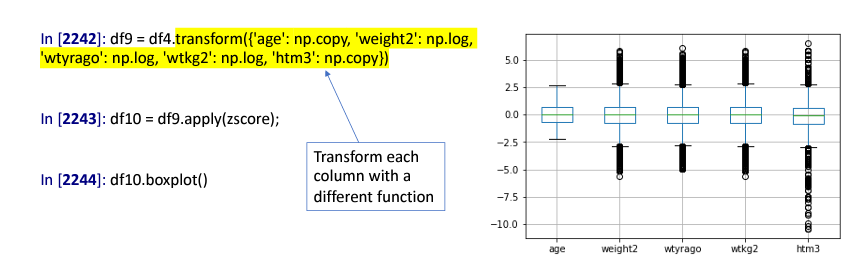

In [59]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\transform.png")

### Machine learning intro
* Regression 
* Classification 
* Clustering 
* Dimension reduction 
* Feature selection

### This topic
* Simple linear regression 
* Multi linear regression 
* Ridge regression 
* Lasso 
* Logistic regression (for classification)

### Recall: Pearson Correlation Coefficient
* a single number that measures both the strength and direction of the linear relationship between two continuous variables
* it has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmg0dRoJ1DiowlpdYiJy3G3SoMtC1wrFPhMw&usqp=CAU)

### Linear regression
* In correlation, the two variables are treated as equals.  In regression, one variable is considered independent (=predictor) variable (X) and the other the dependent (=outcome) variable Y.
* The output of a regression is a function that predicts the dependent variable based upon values of the independent variables.
* Simple regression fits a straight line to the data.

### What is “Linear”?
* Remember this: 
    * Y=a + β X?
        * A slope of β means that every 1-unit change in X yields a β -unit change in Y.

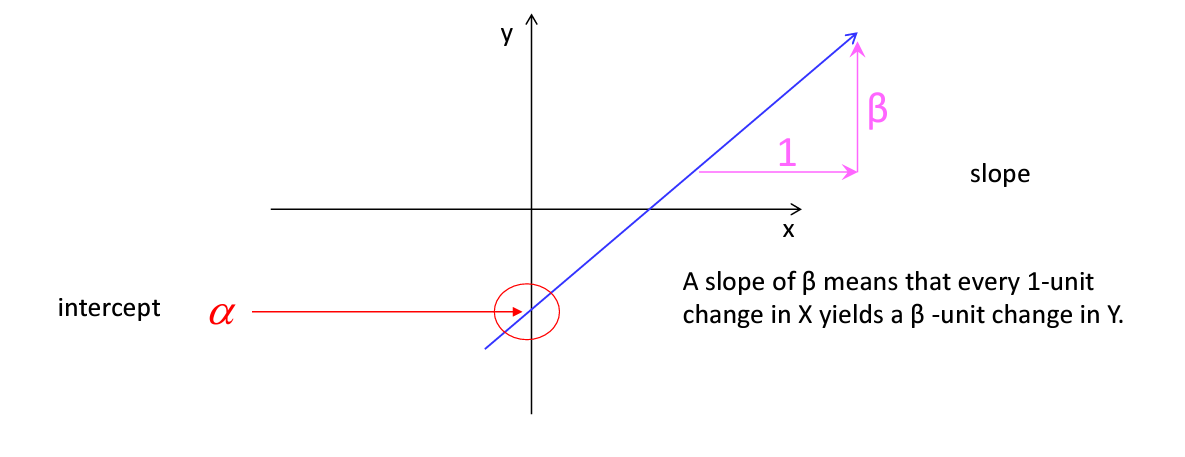

In [60]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\slope.png")

### Prediction
* If you know something about X, this knowledge helps you predict something about Y.  (Sound familiar?…sound like conditional probabilities?)


### Regression equation
* Expected value of y at a given level of x

![](https://www.gstatic.com/education/formulas2/443397389/en/regression_analysis.svg)

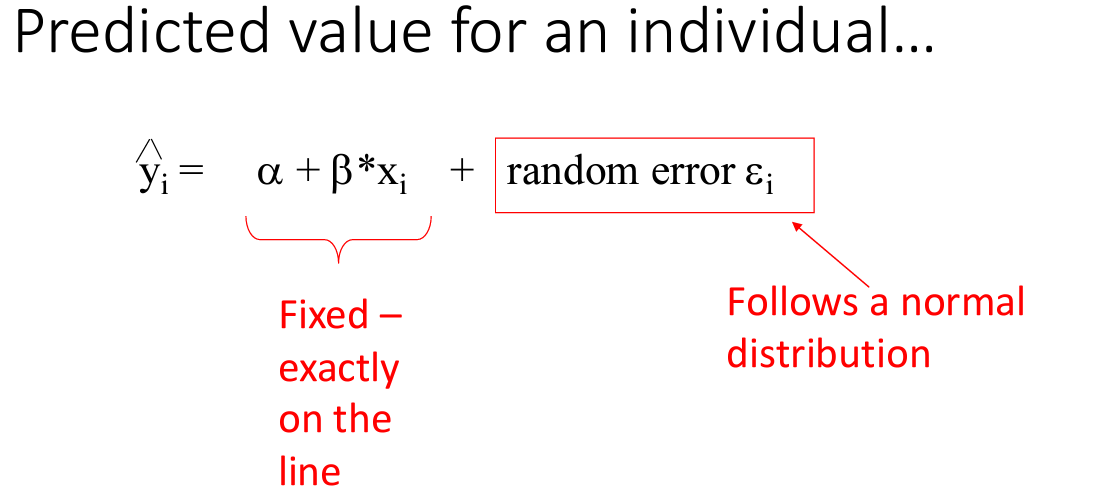

In [61]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\rand.png")